## Imports

In [59]:
import sys
import os
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import pandas as pd
import numpy as np
# Add parent directory to path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

## Compare model output to MILP output

In [61]:
with open("results/actions.pkl", "rb") as f:
    data = pickle.load(f)
    print(data.keys())
    milp_actions = data["milp"]
    sl_actions = data["sl_dec"]

dict_keys(['milp', 'sl_dec'])


### Multiple agents simultaneously

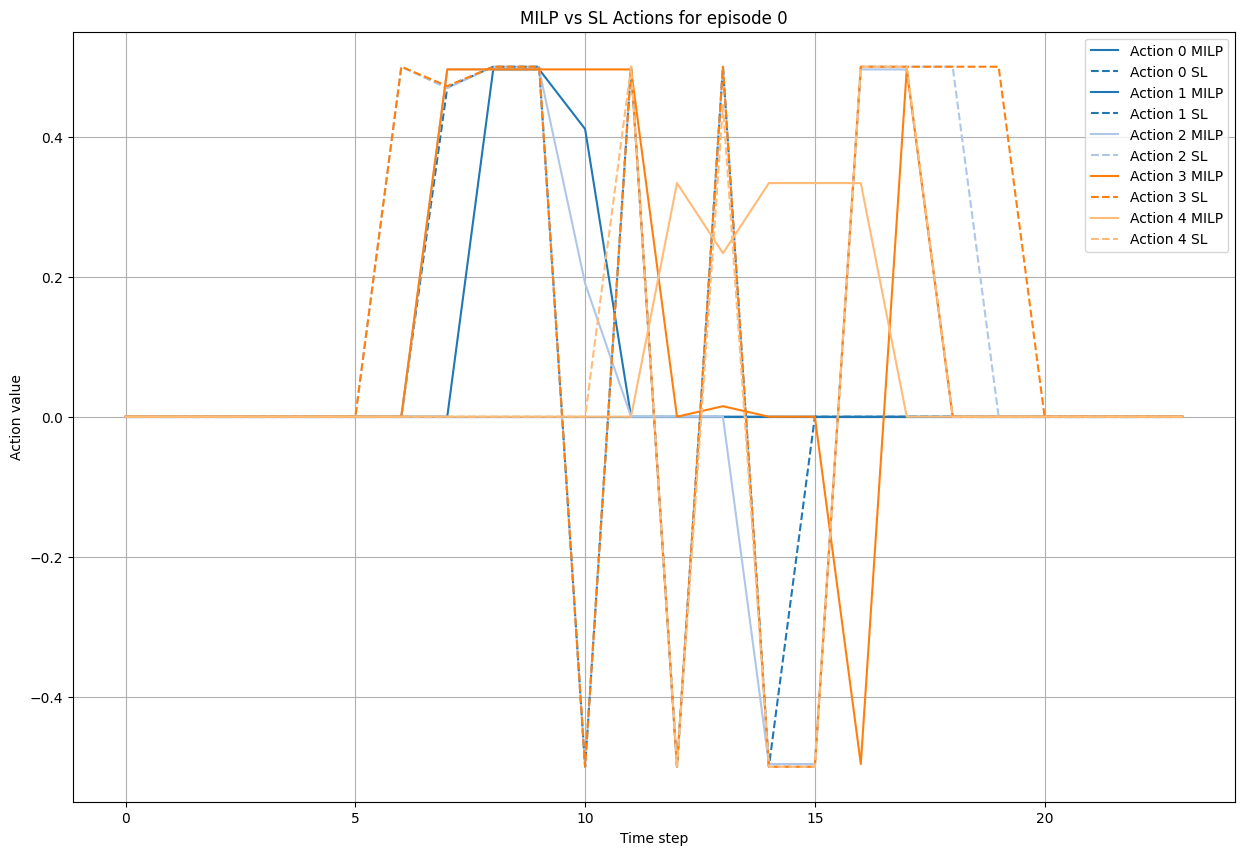

In [57]:
num_episodes = 1

def plot_agent_actions_comparison(milp_actions, sl_actions, num_episodes):
    num_actions = len(milp_actions[0][0])
    colors = plt.get_cmap("tab20", num_actions)

    for ep_idx, (episode_milp, episode_sl) in enumerate(zip(milp_actions, sl_actions)):
        if ep_idx >= num_episodes:
            continue
        plt.figure(figsize=(15,10))

        for idx in range(5):
            milp_vals = [step[idx] for step in episode_milp]
            sl_vals = [step[idx] for step in episode_sl]
            plt.plot(milp_vals, linestyle='-', color=colors(idx), label=f'Action {idx} MILP' if idx < 15 else "")
            plt.plot(sl_vals, linestyle='--', color=colors(idx), label=f'Action {idx} SL' if idx < 15 else "")

        plt.xlabel("Time step")
        plt.ylabel("Action value")
        plt.title(f"MILP vs SL Actions for episode {ep_idx}")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_agent_actions_comparison(milp_actions, sl_actions, num_episodes)

### 1 agent at at time 

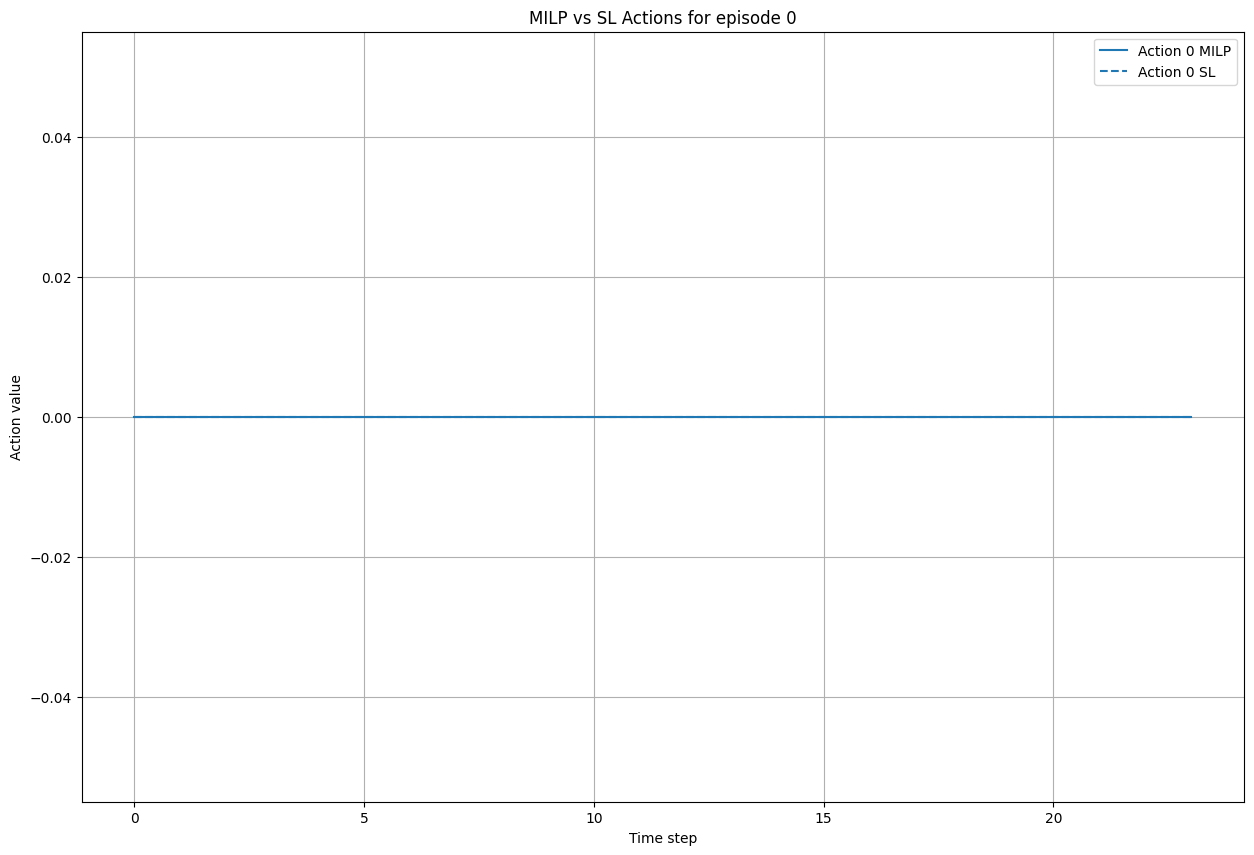

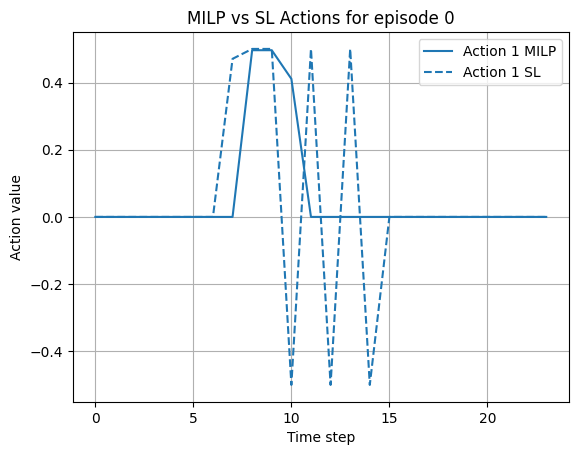

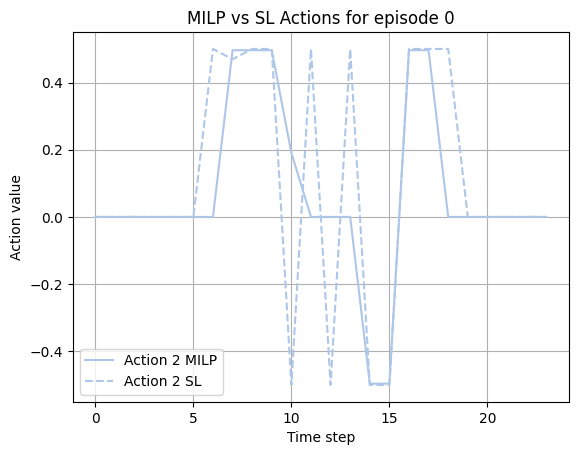

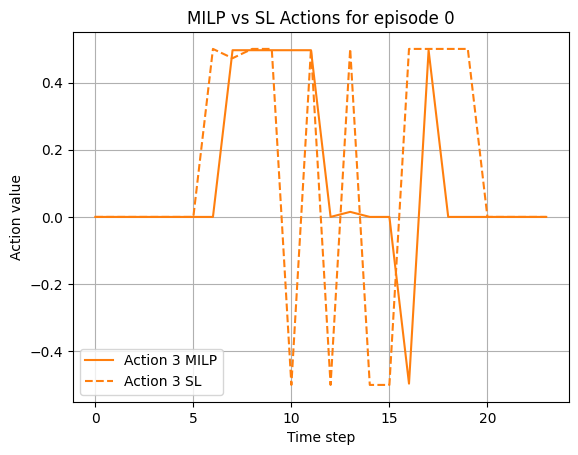

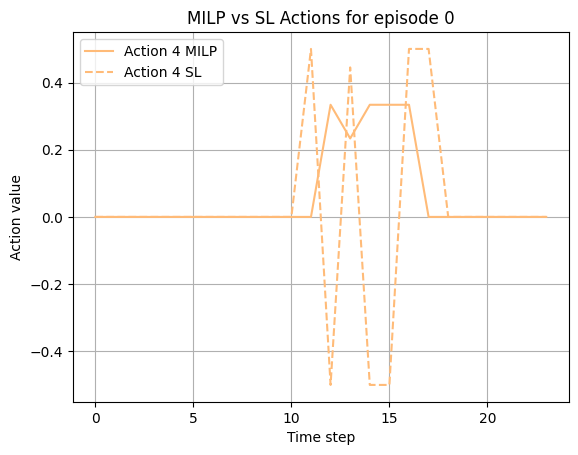

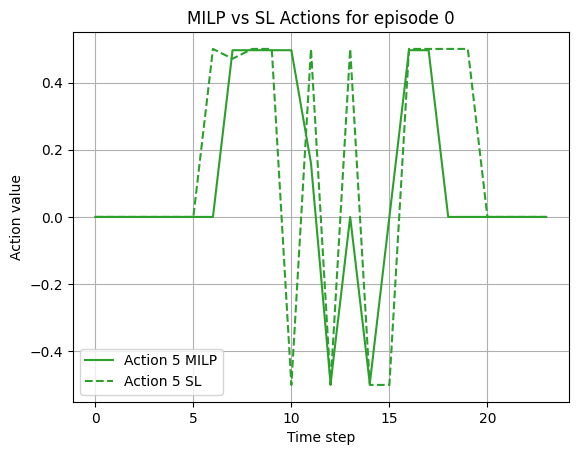

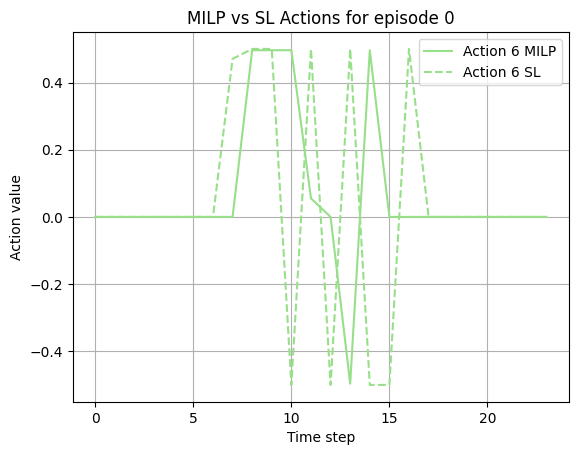

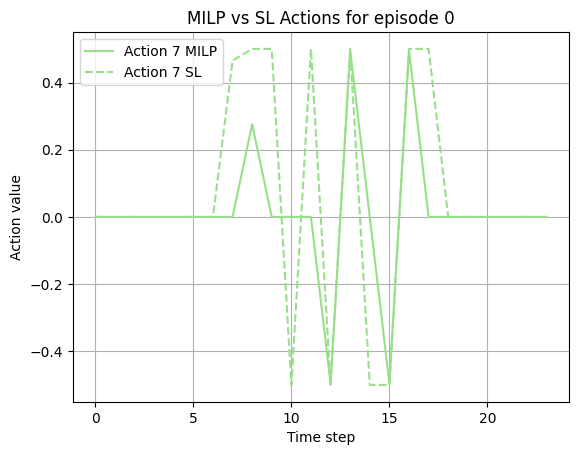

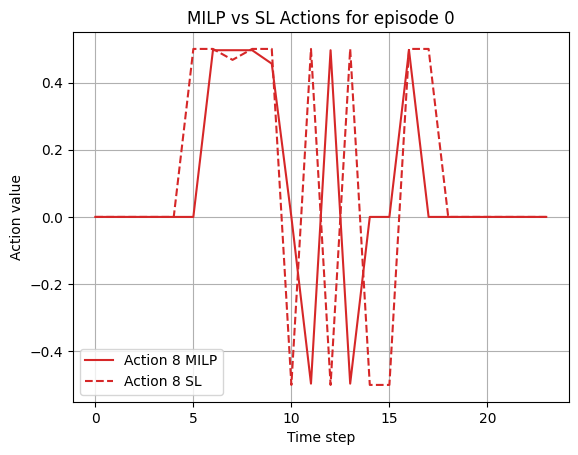

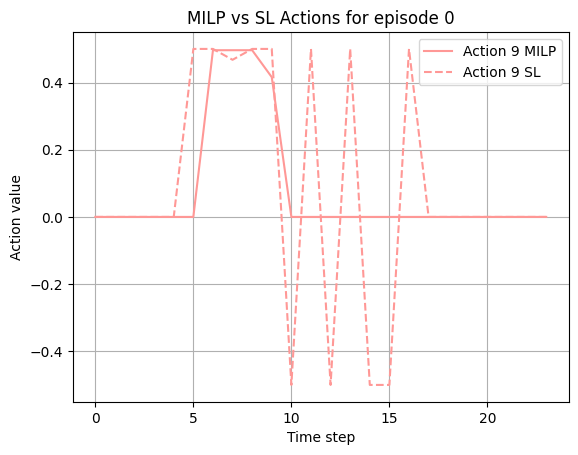

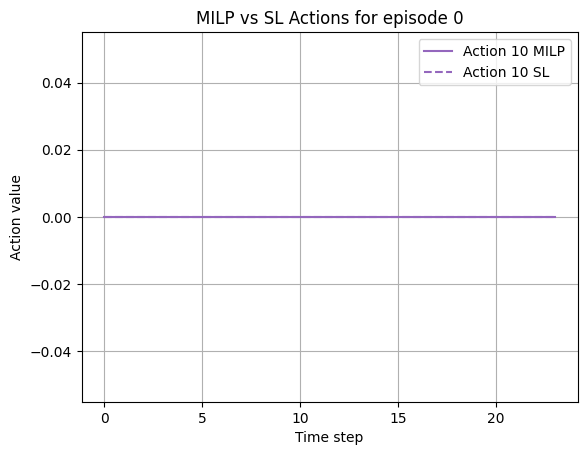

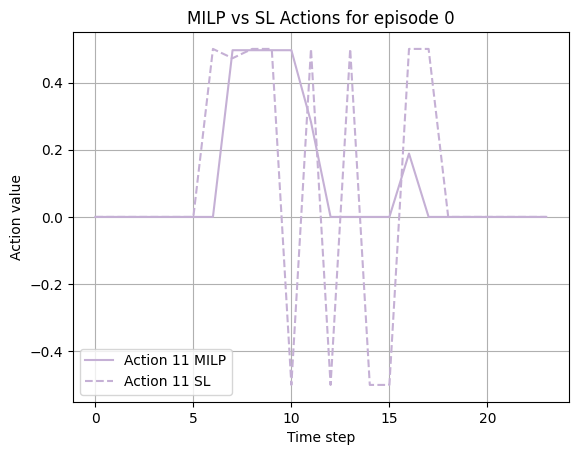

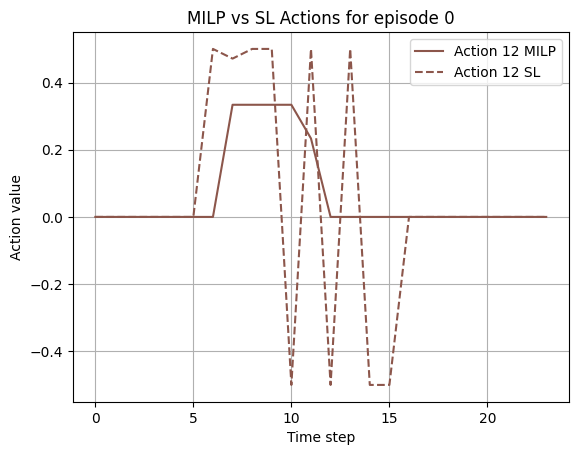

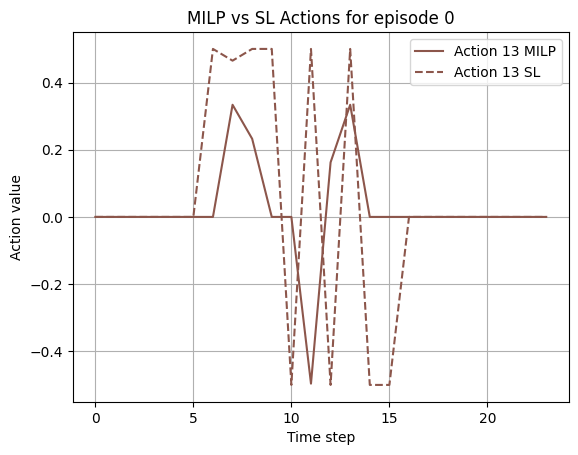

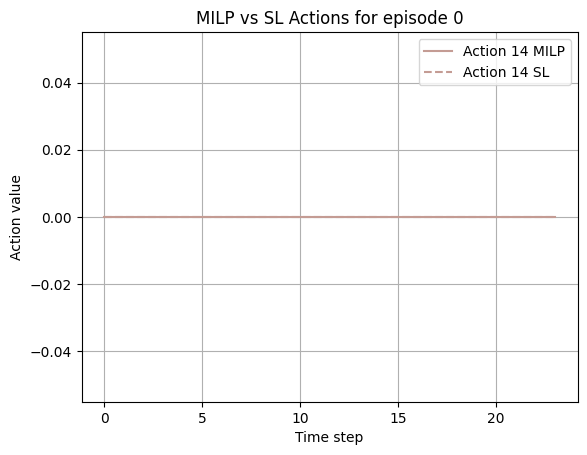

In [58]:
num_episodes = 1

def plot_agent_actions_comparison(milp_actions, sl_actions, num_episodes):
    num_actions = len(milp_actions[0][0])
    colors = plt.get_cmap("tab20", num_actions)

    for ep_idx, (episode_milp, episode_sl) in enumerate(zip(milp_actions, sl_actions)):
        if ep_idx >= num_episodes:
            continue
        plt.figure(figsize=(15,10))

        for idx in range(15):
            milp_vals = [step[idx] for step in episode_milp]
            sl_vals = [step[idx] for step in episode_sl]
            plt.plot(milp_vals, linestyle='-', color=colors(idx), label=f'Action {idx} MILP' if idx < 15 else "")
            plt.plot(sl_vals, linestyle='--', color=colors(idx), label=f'Action {idx} SL' if idx < 15 else "")

            plt.xlabel("Time step")
            plt.ylabel("Action value")
            plt.title(f"MILP vs SL Actions for episode {ep_idx}")
            plt.legend()
            plt.grid(True)
            plt.show()

plot_agent_actions_comparison(milp_actions, sl_actions, num_episodes)

## Dataset

### Feature correlation

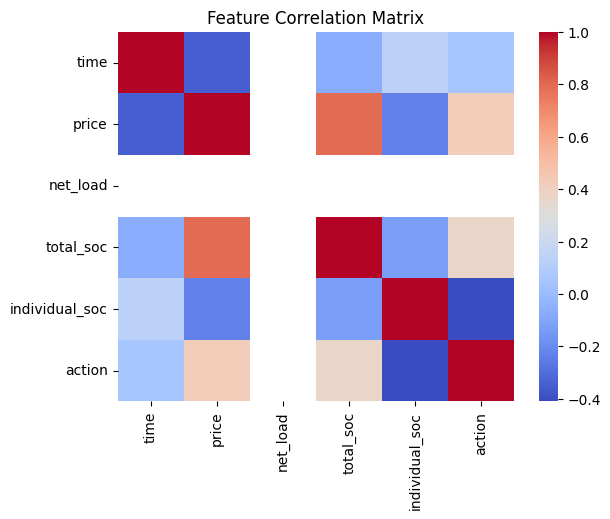

In [60]:
df = pd.read_csv('data/decentralized_csv/decentralized_dataset_0.csv')
import seaborn as sns
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))

dfs = df[df['action'] != 0] 
sns.heatmap(dfs.corr(), cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


### Dataset statistics

In [63]:
df = np.load('data/decentralized_dataset.npz')
states = df['states']
actions = df['actions']
df = pd.DataFrame(states, columns=['time','price','net_load','total_soc','individual_soc'])
df['action'] = actions
print(f'With soc==0: {len(df)}')
df = df[df['individual_soc'] != 0]
print(f'Only soc!=0: {len(df)}')
correlation = df.corr().loc['individual_soc', 'action']
df.describe()

With soc==0: 5508000
Only soc!=0: 5475795


,time,price,net_load,total_soc,individual_soc,action
count,5.475795e+06,5.475795e+06,5.475795e+06,5.475795e+06,5.475795e+06,5.475795e+06
mean,1.085779e+03,-1.880654e-01,3.241836e-02,1.771305e-01,9.949186e-01,3.228006e-02
std,6.199532e+02,1.334566e-01,1.991217e+00,8.411835e-01,2.520460e-02,1.539302e-01
min,4.000000e+00,-8.710000e-01,0.000000e+00,3.672187e-02,1.543210e-01,-4.961604e-01
25%,5.490000e+02,-2.480700e-01,0.000000e+00,6.205456e-02,9.953043e-01,0.000000e+00
50%,1.086000e+03,-1.499000e-01,0.000000e+00,7.860272e-02,9.982609e-01,0.000000e+00
75%,1.623000e+03,-9.978000e-02,0.000000e+00,1.120849e-01,9.995680e-01,0.000000e+00
max,2.159000e+03,5.000000e-01,3.321887e+02,2.480519e+01,1.000000e+00,4.961604e-01


### Plot actions on total vs individual SOC

/tmp/ipykernel_29819/3608417202.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/piotr/Projects/uni/RSDM/EV-charging/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


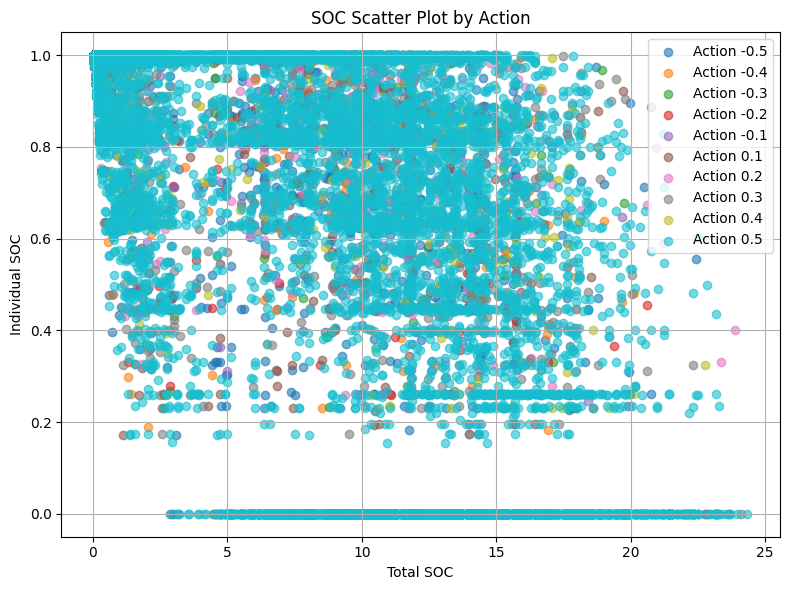

In [62]:
df = np.load('data/decentralized_dataset.npz')
states = df['states']
actions = df['actions']
df = pd.DataFrame(states, columns=['time','price','net_load','total_soc','individual_soc'])
df['action'] = actions

df['action'] = df['action'].round(1)
df = df[df['action'] != 0]

plt.figure(figsize=(8, 6))
for action, group in df.groupby('action'):

    plt.scatter(group['total_soc'], group['individual_soc'], label=f'Action {action}', alpha=0.6)

plt.xlabel('Total SOC')
plt.ylabel('Individual SOC')
plt.title('SOC Scatter Plot by Action')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot action distribution

/tmp/ipykernel_21944/267257133.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


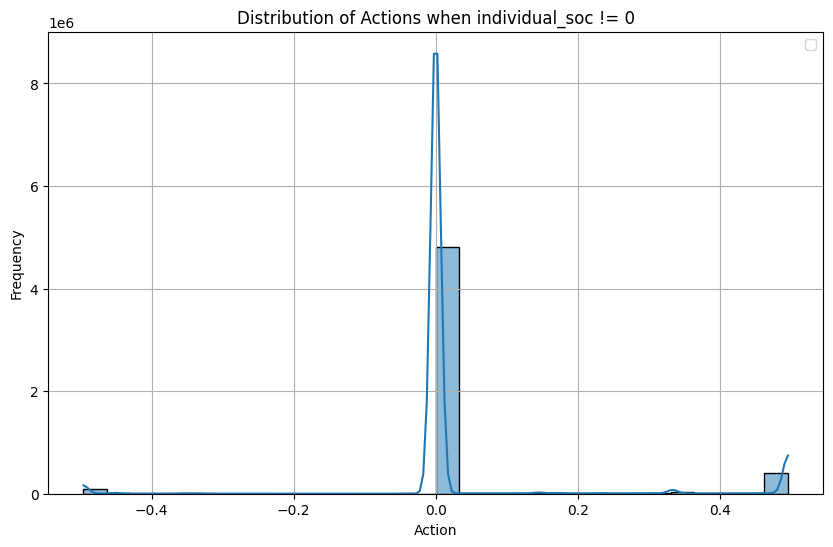

In [ ]:
data = np.load("data/decentralized_dataset.npz")
X = data['states']
y = data['actions']
mask = X[:, -1] != 0
X = X[mask]
y = y[mask]
import seaborn as sns
# Plot distribution of individual_soc when action == 0
plt.figure(figsize=(10, 6))
sns.histplot(y[:,0], bins=30, kde=True)
plt.title('Distribution of Actions when individual_soc != 0')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_21944/4172473714.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


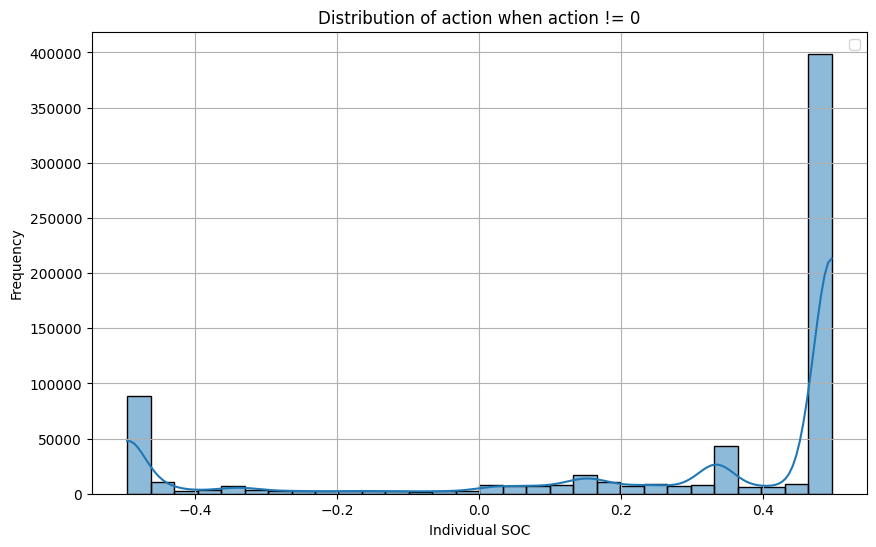

In [30]:
data = np.load("data/decentralized_dataset.npz")
X = data['states']
y = data['actions']
mask = y[:, 0] != 0
X = X[mask]
y = y[mask]
import seaborn as sns
# Plot distribution of individual_soc when action == 0
plt.figure(figsize=(10, 6))
sns.histplot(y[:,0], bins=30, kde=True)
plt.title('Distribution of action when action != 0')
plt.xlabel('Individual SOC')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



### Plot distribution of SOC when action == 0

/tmp/ipykernel_21944/3713335257.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


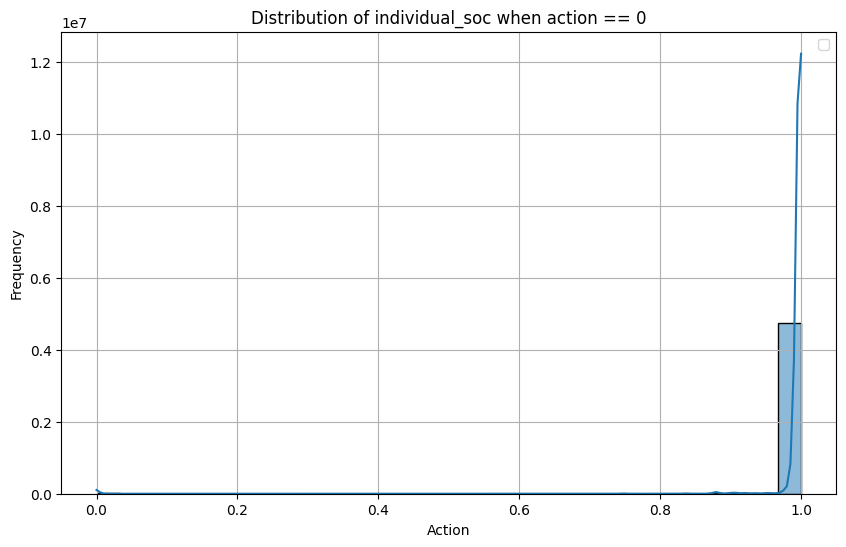

In [33]:
data = np.load("data/decentralized_dataset.npz")
X = data['states']
y = data['actions']
mask = y[:, -1] == 0
X = X[mask]
y = y[mask]
import seaborn as sns
# Plot distribution of individual_soc when action == 0
plt.figure(figsize=(10, 6))
sns.histplot(X[:,-1], bins=30, kde=True)
plt.title('Distribution of individual_soc when action == 0')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



In [35]:
data = np.load("data/decentralized_dataset.npz")
X = data['states']
print(len(X))
y = data['actions']
mask = y[:, -1] == 0
maska = X[:, -1] == 1
X = X[mask & maska]
print(len(X))

5508000
683813


In [11]:
data = np.load("data/decentralized_dataset.npz")
states = data['states']
actions = data['actions']
X[:,0] = X[:,0] % 24

np.savez("data/decentralized_dataset_3.npz", states=states, actions=actions)
